In [31]:
import seaborn as sns
# 붓꽃 데이터셋 로딩
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# 품종 확인
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
X = iris.iloc[:, :4].values # 독립변수
y = iris.iloc[:,4].values #종속변수
print(y[:5])
encoder=LabelEncoder() #문자열에 label을 붙임
y1 = encoder.fit_transform(y)
print(y1[:5])
y2 = pd.get_dummies(y1).values #종속변수에 대한 원핫인코딩 처리
print(y2[:5])

['setosa' 'setosa' 'setosa' 'setosa' 'setosa']
[0 0 0 0 0]
[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]]


In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.2, stratify=y, random_state=10)

In [41]:
from keras.models import Sequential
from keras.layers import Dense

# 모델 생성
model = Sequential()
model.add(Dense(64,input_shape=(4,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.4663 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 1.0762 - accuracy: 0.4083
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.9815 - accuracy: 0.4833
Epoch 4/100
4/4 [==============================] - 0s 26ms/step - loss: 0.9266 - accuracy: 0.5500
Epoch 5/100
4/4 [==============================] - 0s 8ms/step - loss: 0.8563 - accuracy: 0.5667
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.7858 - accuracy: 0.8167
Epoch 7/100
4/4 [==============================] - 0s 11ms/step - loss: 0.7309 - accuracy: 0.8500
Epoch 8/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6871 - accuracy: 0.8750
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.9000
Epoch 10/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5956 - accuracy: 0.8917
Epoch 11/100
4/4 [=========

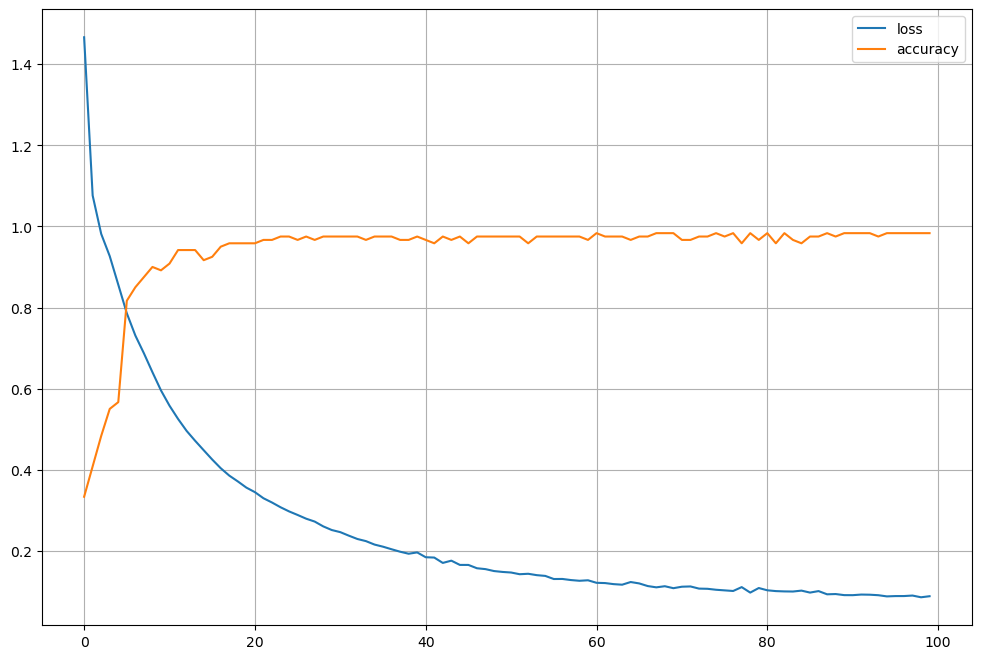

In [42]:
import matplotlib.pyplot as plt
#그래프 출력
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [43]:
#모델 평가
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("정확도 = {:.2f}".format(accuracy))

정확도 = 0.97


In [44]:
import numpy as np
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
print(pred[:10])
y_test_class = np.argmax(y_test,axis=1)
pred_class = np.argmax(pred,axis=1)
print(y_test_class[:10])
print(pred_class[:10])
print(confusion_matrix(y_test_class,pred_class))

1/1 [==============================] - 0s 80ms/step
[[2.7860012e-03 7.4421859e-01 2.5299543e-01]
 [9.9450338e-01 5.4966616e-03 1.5687025e-08]
 [1.6920839e-03 3.0610135e-01 6.9220656e-01]
 [9.7357325e-04 3.5887879e-01 6.4014757e-01]
 [1.9924521e-02 9.7390342e-01 6.1720675e-03]
 [2.3168126e-04 9.9595569e-02 9.0017271e-01]
 [9.9241698e-01 7.5830342e-03 4.6314558e-08]
 [3.4117031e-05 9.5053297e-03 9.9046057e-01]
 [1.7151880e-05 5.3658271e-03 9.9461704e-01]
 [9.9948657e-01 5.1341252e-04 7.7668254e-11]]
[1 0 1 2 1 2 0 2 2 0]
[1 0 2 2 1 2 0 2 2 0]
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


In [45]:
model.save('../../models/iris.h5') # 모델을 압축한 파일 1개
# model.save('../../models') # 디렉토리로 저장 : 세부적인 파일별로 나누어 저장